Figures for Section 1.3

In [2]:
# how to import the function from another python file
# should I create a main function?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [5]:
# read dat file
def reaDat(filename):
    # read dat to a list of lists
    data = [i.strip().split() for i in open("../data/"+filename).readlines()]
    data_df = pd.DataFrame(data)
    
    # change datatype from str to int
    data_df = data_df.astype({0:'float'})
    
#     fig, ax = plt.subplots()
#     ax.plot(xlim, data_df,'o-')

    return data_df

In [8]:
# time series plot
def plotDat(ts, xlim):
    fig, ax = plt.subplots()
    ax.plot(xlim,ts,'o-')

Figure 1.7

Annual water levels of Lake Huron (left panel) and the residual plot obtained from fitting a
linear trend to the data (right panel).

In [182]:
lake = reaDat("lake.dat")
# plotDat(lake, range(1875,1973))

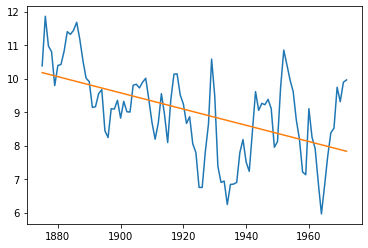

In [183]:
#find line of best fit
x = range(1,len(lake)+1)
x_1875 = range(1875,1973)
a, b = np.polyfit(x, lake, 1)
fitted = np.polyval([a,b],x)

plt.plot(x_1875,lake)
plt.plot(x_1875,a*x+b)

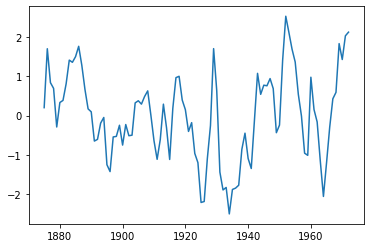

In [46]:
plt.plot(x_1875,lake[0]-fitted)

Figure 1.8

The two-sided moving average filters Wt for the Lake Huron data (upper panel) and their
residuals (lower panel) with bandwidth q = 2 (left), q = 10 (middle) and q = 35 (right).

In [151]:
# create moving windows
def MA(data,q):
    # create an empty list
    l = len(data)
    ma = np.zeros(len(data))
    #ma = []

    # initialize the previous and 
    # latter q entries with NaNs
    ma[0:q] = np.nan
    ma[l-q:l]=np.nan
    for i in range(q,l-q):
        #ma.append(data[i-q:i+q+1].mean())
        ma[i] = data[i-q:i+q+1].mean()
    
    plt.plot(x_1875, ma, label=f'Moving Average (window={q})')
    
    # Set the plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Moving Average')
    plt.title('Moving Averages')
    plt.legend()

    # Display the plot
    plt.show()

    return ma

In [178]:
# plot fitted line
def plotFitted(MA_data,q):
    l = len(MA_data)
    x_range = range(l-2*q)
    data_fit = MA_data[q:l-q]
    a,b = np.polyfit(x_range, data_fit,1)
    fitted = np.polyval([a,b],x_range)
    #print(fitted)

    # x_slim
    x_slim = range(1875+q,1973-q)
        
    #plt.plot(x,MA_data)
    plt.plot(x_slim, data_fit-fitted, label=f'Residuals with bandwidth={q}')
    plt.legend()
    plt.show()

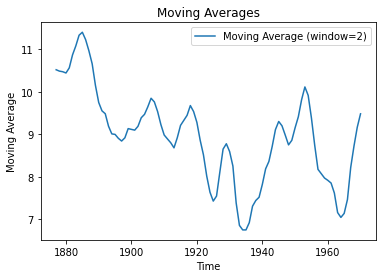

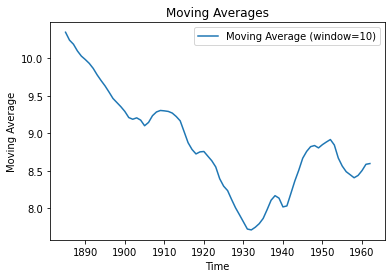

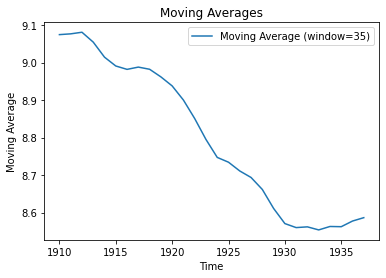

In [154]:
ma2 = MA(lake[0],2)
ma10 = MA(lake[0],10)
ma35 = MA(lake[0],35)

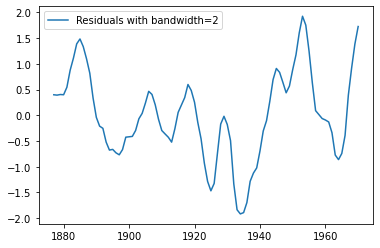

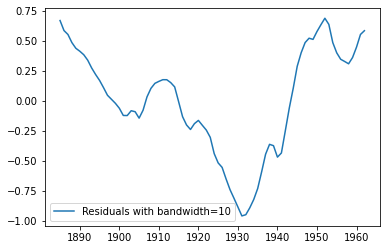

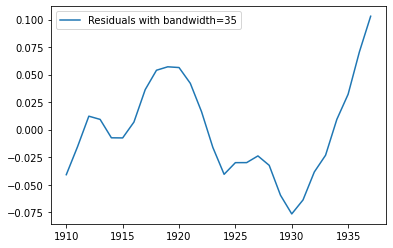

In [179]:
plotFitted(ma2,2)
plotFitted(ma10,10)
plotFitted(ma35,35)

Figure 1.9

Time series plots of the observed sequences ($\nabla x_t$) in the left panel and ($\nabla^2 x_t$) in the right
panel of the differenced Lake Huron data described in Example 1.3.1.

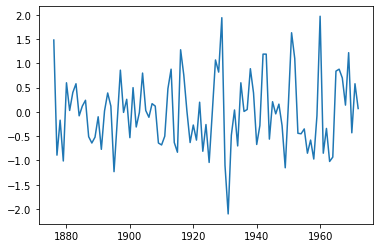

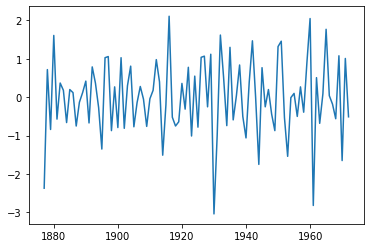

In [193]:
df1 = np.diff(lake[0])
plt.plot(range(1876,1973),df1)
plt.show()

df2 = np.diff(df1)
plt.plot(range(1877,1973),df2)

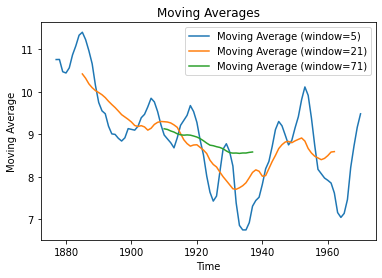

In [145]:
# Generate 't' as a sequence from 1 to the length of 'lake'
t = np.arange(1, len(lake) + 1)

# Define the moving averages
ma2 = pd.Series(lake[0]).rolling(window=5, center=True).mean()
ma10 = pd.Series(lake[0]).rolling(window=21, center=True).mean()
ma35 = pd.Series(lake[0]).rolling(window=71, center=True).mean()

a_2, b_2 = np.polyfit(x, ma2, 1)
fitted_2 = np.polyval([a_2,b_2],x)


# Plot the moving averages
plt.plot(x_1875, ma2, label='Moving Average (window=5)')
# plt.plot(x_1875,fitted_2)
plt.plot(x_1875, ma10, label='Moving Average (window=21)')
plt.plot(x_1875, ma35, label='Moving Average (window=71)')

# Set the plot labels and title
plt.xlabel('Time')
plt.ylabel('Moving Average')
plt.title('Moving Averages')
plt.legend()

# Display the plot
plt.show()
